# Malaysia Dengue Data from 2010 to 2015 

Data exploration project, 18/8/2018

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

dengue = pd.read_csv(r"D:\Python datasets\dengue.csv")
dengue.head()

,Tahun,Minggu,Negeri,Daerah/Zon/PBT,Lokaliti,Jumlah Kes Terkumpul,Tempoh Wabak Berlaku (Hari)
0,2010,9,Selangor,MPSJ,Pjs 9,17,109
1,2010,9,Selangor,MBPJ,Flat Desa Mentari Pjs 6,24,99
2,2010,9,Selangor,Petaling,Seksyen 7 Flat A,59,86
3,2010,9,Selangor,MPSJ,Ss 18,63,85
4,2010,9,Selangor,MPSJ,Usj 2,18,76


In [2]:
dengue.shape

(9857, 7)

In [4]:
dengue.dropna(inplace = True)

In [5]:
dengue.shape

(9857, 7)

In [17]:
dengue.columns = dengue.columns.str.lower()
dengue.head()

,tahun,minggu,negeri,daerah/zon/pbt,lokaliti,jumlah kes terkumpul,tempoh wabak berlaku (hari)
0,2010,9,Selangor,MPSJ,Pjs 9,17,109
1,2010,9,Selangor,MBPJ,Flat Desa Mentari Pjs 6,24,99
2,2010,9,Selangor,Petaling,Seksyen 7 Flat A,59,86
3,2010,9,Selangor,MPSJ,Ss 18,63,85
4,2010,9,Selangor,MPSJ,Usj 2,18,76


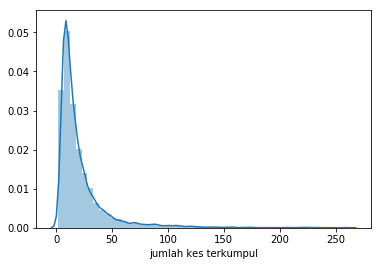

In [18]:
fig = plt.figure(figsize=(20,15))
sns.distplot(dengue['jumlah kes terkumpul'], kde = True)

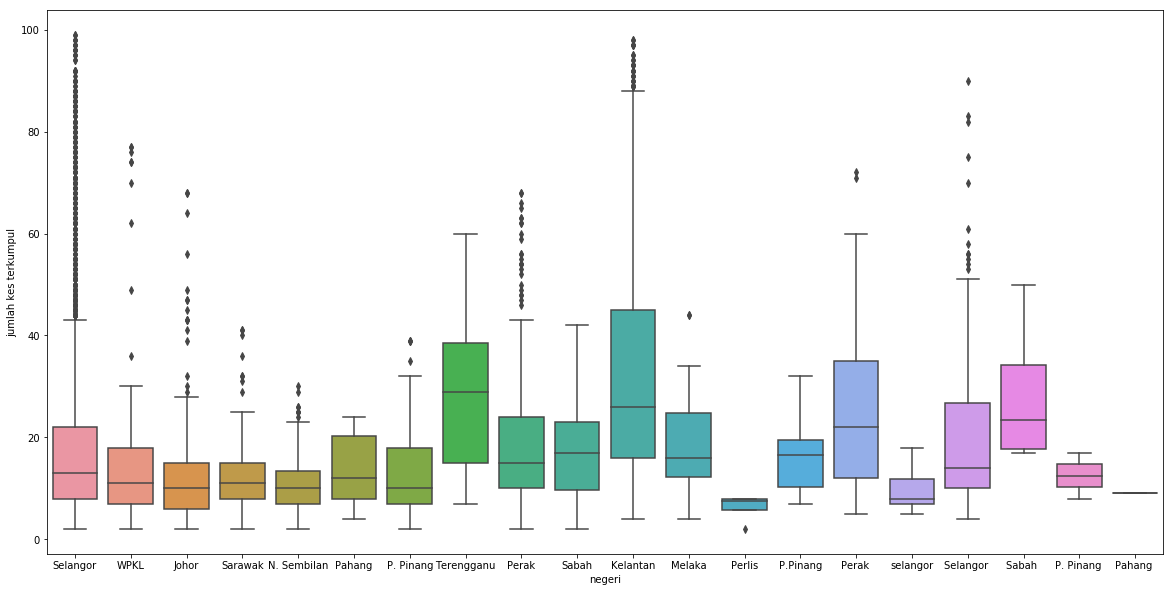

In [30]:
dengue1 = dengue[dengue['jumlah kes terkumpul'] < 100]
fig = plt.figure(figsize= (20,10))
sns.boxplot(x = 'negeri', y ='jumlah kes terkumpul', data = dengue1)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

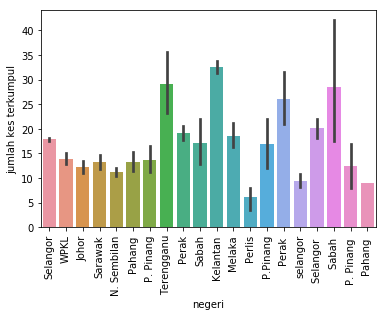

In [32]:
sns.barplot(x = 'negeri', y = 'jumlah kes terkumpul', data = dengue1)
plt.xticks(rotation=90)

In [38]:
selangor = dengue1[dengue1['negeri'] == "Selangor"] 
selangor.head()

,tahun,minggu,negeri,daerah/zon/pbt,lokaliti,jumlah kes terkumpul,tempoh wabak berlaku (hari)
0,2010,9,Selangor,MPSJ,Pjs 9,17,109
1,2010,9,Selangor,MBPJ,Flat Desa Mentari Pjs 6,24,99
2,2010,9,Selangor,Petaling,Seksyen 7 Flat A,59,86
3,2010,9,Selangor,MPSJ,Ss 18,63,85
4,2010,9,Selangor,MPSJ,Usj 2,18,76


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

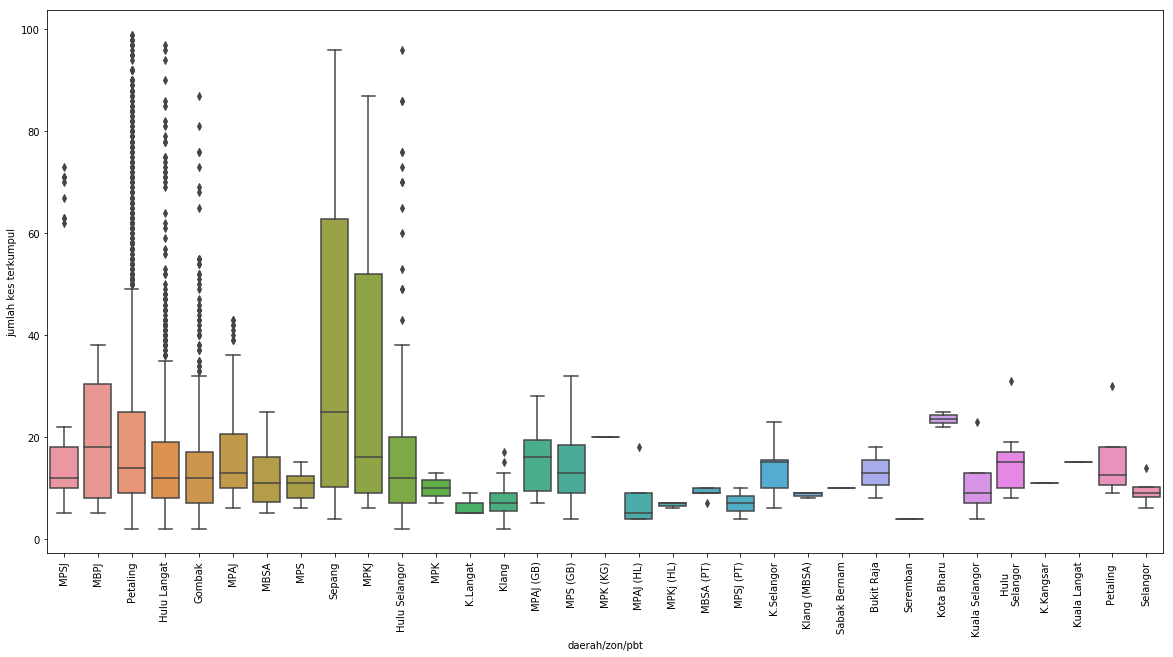

In [42]:
fig = plt.figure(figsize= (20,10))
sns.boxplot(x = 'daerah/zon/pbt', y = 'jumlah kes terkumpul', data = selangor)
plt.xticks(rotation=90)

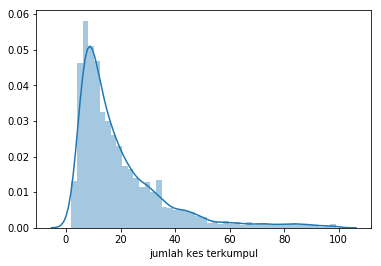

In [46]:
petaling = selangor[selangor['daerah/zon/pbt'] == "Petaling"]
sns.distplot(petaling['jumlah kes terkumpul'])


In [47]:
petaling.describe()

,tahun,minggu,jumlah kes terkumpul,tempoh wabak berlaku (hari)
count,3678.000000,3678.000000,3678.000000,3678.000000
mean,2014.072322,25.884992,19.645188,60.051930
std,0.619852,18.892712,16.485808,30.877067
min,2010.000000,1.000000,2.000000,1.000000
25%,2014.000000,5.000000,9.000000,38.000000
50%,2014.000000,28.000000,14.000000,51.000000
75%,2014.000000,45.000000,25.000000,72.000000
max,2015.000000,53.000000,99.000000,254.000000


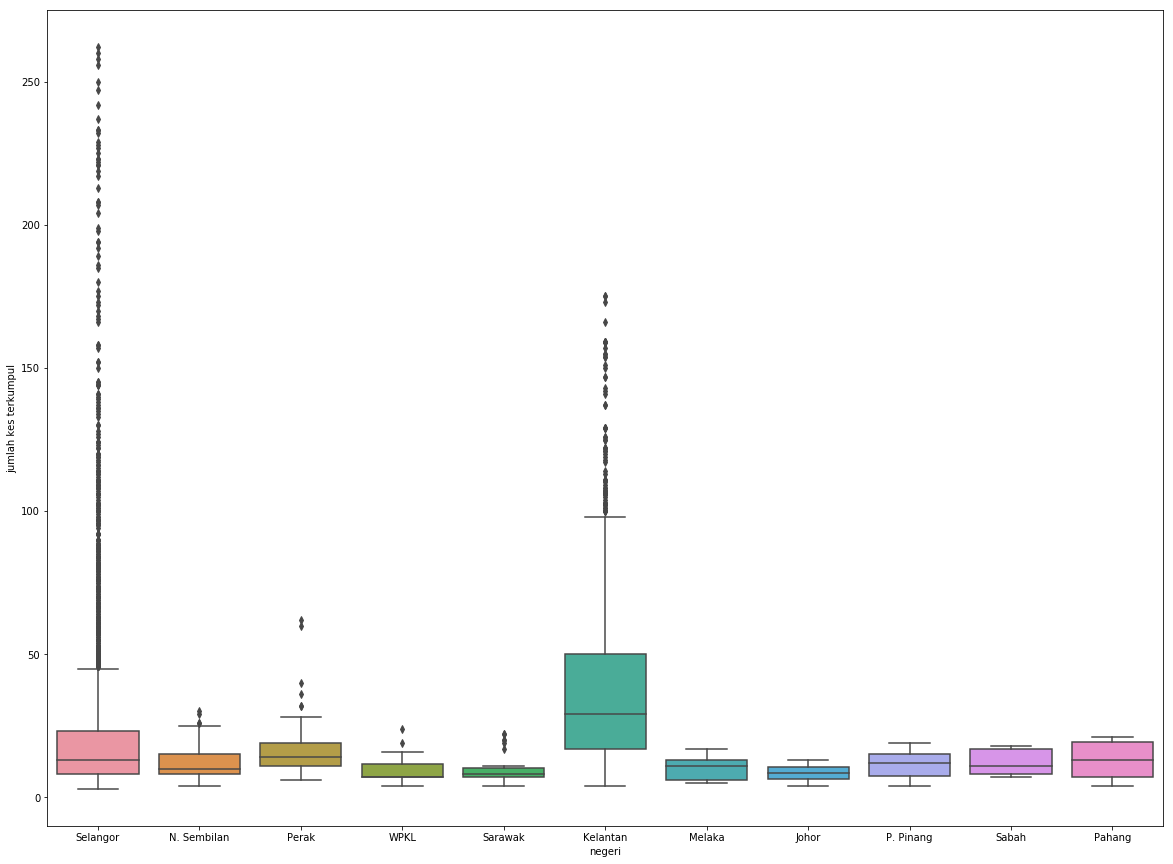

In [55]:
df = dengue[dengue['tahun'] == 2014]
fig = plt.figure(figsize = (20,15))
sns.boxplot(x = 'negeri' , y = 'jumlah kes terkumpul', data = df)

### Does the high temperature contribute to higher dengue case?

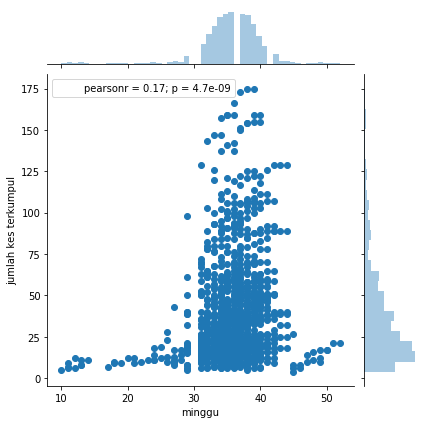

In [58]:
df1 = df[df['negeri'] == "Kelantan"]
sns.jointplot(x = 'minggu', y = 'jumlah kes terkumpul', data = df1)

## Temperature for 2014 in Kelantan
In January 2014, Malaysian media reports say the temperature dipped to *17 deg C* in Kuala Krai, in Kelantan state, due to a cold air surge caused by the north-east monsoon too.

Kuala Krai In Kelantan Recorded The Lowest Temperature Yet. It Dropped From 32°C On 7 Jan 2014, To 17.2°C On 23 Jan 2014.

From week 30 onwards, it is the hot month for Kelantanese

## Not too hot, not too cold
From Futurity.org: "The group found that mosquito traits favorable to spreading disease peaked when temperatures reached 29 degrees Celsius (84 degrees Fahrenheit), but were lower when temperatures were cooler or warmer." 



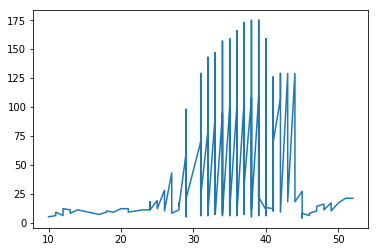

In [60]:
plt.plot(df1['minggu'], df1['jumlah kes terkumpul'])

## Will be exploring Water temperature for Kelantan in 2014, soon